In [425]:
import pandas as pd

In [426]:
df = pd.read_csv('data/matches.csv')

In [427]:
df['city'] = df['location'].apply(lambda x: x.split(',')[-1].split('(')[0].strip() if isinstance(x, str) else x)

In [428]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

## Let's count the remaining teams for every stage/season/cup

In [429]:
compdates = df[['season','competition','date','homeTeam','awayTeam','phase']]

In [430]:
compdates

,season,competition,date,homeTeam,awayTeam,phase
0,1965-66,CWC,1966-04-14,Celtic,Liverpool,semi-finals
1,1955-58,ICFC,1955-06-04,Basel XI,London XI,group stage
2,1955-56,UCL,1955-09-04,Sporting CP,Partizan,first round
3,1955-56,UCL,1955-09-07,Vörös Lobogó,Anderlecht,first round
4,1955-56,UCL,1955-09-08,Servette,Real Madrid,first round
...,...,...,...,...,...,...
27321,2024-25,UECL,2024-08-15,Larne,Ballkani,third qualifying round
27322,2024-25,UECL,2024-08-15,Hajduk Split,Ružomberok,third qualifying round
27323,2024-25,EL,2024-08-15,Viktoria Plzeň,Kryvbas Kryvyi Rih,third qualifying round
27324,1965-66,UCL,NaT,Derry City,Anderlecht,first round


In [431]:
first_match = pd.DataFrame(compdates.groupby(['season','competition','phase'])['date'].min()).reset_index()
first_match

,season,competition,phase,date
0,1955-56,UCL,final,1956-06-13
1,1955-56,UCL,first round,1955-09-04
2,1955-56,UCL,quarter-finals,1955-11-23
3,1955-56,UCL,semi-finals,1956-04-04
4,1955-58,ICFC,group stage,1955-06-04
...,...,...,...,...
1171,2024-25,UCL,second qualifying round,2024-07-23
1172,2024-25,UCL,third qualifying round,2024-08-06
1173,2024-25,UECL,first qualifying round,2024-07-10
1174,2024-25,UECL,second qualifying round,2024-07-23


In [432]:
def remaining_phases(row):
    return df[(df['date'] >= row['date']) & (df['competition'] == row['competition']) & (df['season'] == row['season'])]['phase'].drop_duplicates().to_list()

In [433]:
first_match['remaining_phases'] = first_match.apply(lambda x: remaining_phases(x), axis=1)

In [434]:
first_match

,season,competition,phase,date,remaining_phases
0,1955-56,UCL,final,1956-06-13,[final]
1,1955-56,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]"
2,1955-56,UCL,quarter-finals,1955-11-23,"[first round, quarter-finals, semi-finals, final]"
3,1955-56,UCL,semi-finals,1956-04-04,"[semi-finals, final]"
4,1955-58,ICFC,group stage,1955-06-04,"[group stage, knockout stage]"
...,...,...,...,...,...
1171,2024-25,UCL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]"
1172,2024-25,UCL,third qualifying round,2024-08-06,[third qualifying round]
1173,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou..."
1174,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]"


In [435]:
def remaining_teams(row):
    rem_phases = row['remaining_phases']
    remaining_teams = []
    for r in rem_phases:
        ht = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['homeTeam'].drop_duplicates().to_list()
        at = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['awayTeam'].drop_duplicates().to_list()
        remaining_teams = remaining_teams + ht + at
    return list(set(remaining_teams))

In [436]:
first_match['remaining_teams'] = first_match.apply(lambda x: remaining_teams(x), axis=1)

In [437]:
first_match.sample(20)

,season,competition,phase,date,remaining_phases,remaining_teams
1142,2023-24,EL,play-off round,2023-08-24,"[play-off round, groups, knockout round play-o...","[KÍ, Maccabi Haifa, AEK Athens, West Ham Unite..."
1083,2020-21,UCL,quarter-finals,2021-04-06,"[quarter-finals, semi-finals, final]","[Real Madrid, Porto, Paris Saint-Germain, Manc..."
18,1958-59,UCL,preliminary round,1958-08-26,"[preliminary round, first round, quarter-final...","[Real Madrid, IFK Göteborg, Reims, Dukla Pragu..."
1073,2020-21,EL,round of 16,2021-03-11,"[round of 16, quarter-finals, semi-finals, final]","[Rangers, Arsenal, Dinamo Zagreb, Manchester U..."
337,1980-81,CWC,quarter-finals,1981-03-04,"[quarter-finals, semi-finals, final]","[Carl Zeiss Jena, Feyenoord, West Ham United, ..."
353,1981-82,CWC,first round,1981-09-15,"[first round, second round, quarter-finals, se...","[Porto, SKA Rostov, Dukla Prague, Ankaragücü, ..."
175,1969-70,UCL,quarter-finals,1970-03-04,"[quarter-finals, semi-finals, final]","[Vorwärts Berlin, Celtic, Standard Liège, Gala..."
843,2008-09,EL,final,2009-05-20,[final],"[Werder Bremen, Shakhtar Donetsk]"
690,1999-00,UCL,groups,1999-09-14,"[groups, quarter-finals, semi-finals, final]","[Real Madrid, PSV Eindhoven, Porto, Rosenborg,..."
634,1997-98,CWC,semi-finals,1998-04-02,"[semi-finals, final]","[VfB Stuttgart, Vicenza, Lokomotiv Moscow, Che..."


In [438]:
first_match['remaining_teams_count'] = first_match['remaining_teams'].apply(lambda x: len(x))

In [439]:
first_match

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count
0,1955-56,UCL,final,1956-06-13,[final],"[Real Madrid, Reims]",2
1,1955-56,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]","[Real Madrid, Rot-Weiss Essen, PSV Eindhoven, ...",16
2,1955-56,UCL,quarter-finals,1955-11-23,"[first round, quarter-finals, semi-finals, final]","[Real Madrid, Rot-Weiss Essen, PSV Eindhoven, ...",16
3,1955-56,UCL,semi-finals,1956-04-04,"[semi-finals, final]","[Milan, Hibernian, Real Madrid, Reims]",4
4,1955-58,ICFC,group stage,1955-06-04,"[group stage, knockout stage]","[Birmingham City, London XI, Leipzig XI, Barce...",10
...,...,...,...,...,...,...,...
1171,2024-25,UCL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]","[KÍ, Shamrock Rovers, APOEL, Partizan, Dynamo ...",34
1172,2024-25,UCL,third qualifying round,2024-08-06,[third qualifying round],"[APOEL, Dynamo Kyiv, Ferencváros, Fenerbahçe, ...",20
1173,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou...","[Maccabi Haifa, Valur, Breiðablik, Ararat-Arme...",136
1174,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]","[Maccabi Haifa, Valur, Breiðablik, Ararat-Arme...",111


In [440]:
df = df.merge(first_match[['competition','season','phase','remaining_teams_count']], on=['competition','season','phase'], how='outer')

In [441]:
df.loc[df['season'] == '2024-25', 'remaining_teams_count'] = None

In [442]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian_F.C.'
df.loc[df['awayTeamUrl'] == 'Bohemian_F.C.', 'awayTeam'] = 'Bohemian_F.C.'

In [443]:
sjednoceni = {
    'Praha': 'Prague',
    'Chişinău': 'Chisinau',
    'Chișinău': 'Chisinau',
    'Warszawa': 'Warsaw',
    'Moskva': 'Moscow'
        }

In [444]:
for puvodni, spravny in sjednoceni.items():
    df['homeTeam'] = df['homeTeam'].apply(lambda x: x.replace(puvodni, spravny))
    df['awayTeam'] = df['awayTeam'].apply(lambda x: x.replace(puvodni, spravny))

In [445]:
intertoto = df[df['competition'] == 'Intertoto']

In [446]:
df = df[df['competition'] != 'Intertoto']

In [447]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count
0,CWC,1961-05-17,0-2,Rangers,Scotland,Rangers_F.C.,Fiorentina,Italy,ACF_Fiorentina,"Ibrox Park, Glasgow",final,80000,1960–61 European Cup Winners' Cup,1960-61,Glasgow,2.0
1,CWC,1961-05-27,2-1,Fiorentina,Italy,ACF_Fiorentina,Rangers,Scotland,Rangers_F.C.,"Stadio Comunale, Florence",final,27000,1960–61 European Cup Winners' Cup,1960-61,Florence,2.0
2,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Friedrich-Ludwig-Jahn-Sportpark, Berlin",preliminary round,8000,1960–61 European Cup Winners' Cup,1960-61,Berlin,10.0
3,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,"Stadion Za Lužánkami, Brno",preliminary round,15000,1960–61 European Cup Winners' Cup,1960-61,Brno,10.0
4,CWC,1960-09-28,4-2,Rangers,Scotland,Rangers_F.C.,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Ibrox Park, Glasgow",preliminary round,36024,1960–61 European Cup Winners' Cup,1960-61,Glasgow,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27321,UECL,2024-08-15,v,Baník Ostrava,Czech Republic,NaN,Copenhagen,Denmark,NaN,"Městský stadion, Ostrava",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Ostrava,NaN
27322,UECL,2024-08-15,v,Sheriff Tiraspol,Moldova,NaN,Olimpija Ljubljana,Slovenia,NaN,"Sheriff Arena, Tiraspol",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Tiraspol,NaN
27323,UECL,2024-08-15,v,Larne,Northern Ireland,NaN,Ballkani,Kosovo,NaN,"Inver Park, Larne",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Larne,NaN
27324,UECL,2024-08-15,v,Hajduk Split,Croatia,NaN,Ružomberok,Slovakia,NaN,"Stadion Poljud, Split",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Split,NaN


## Better to check for errors

<Axes: xlabel='season'>

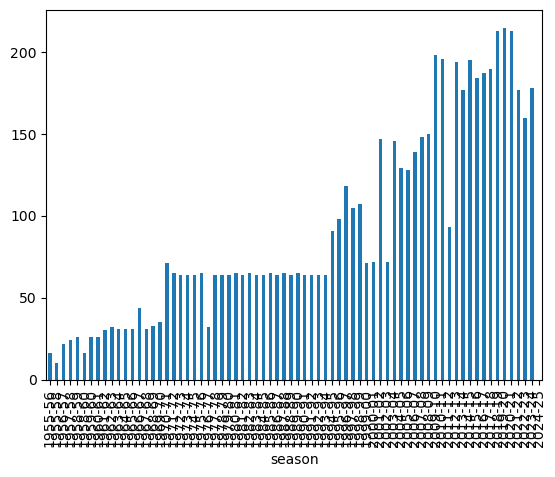

In [448]:
df.groupby('season')['remaining_teams_count'].max().plot.bar()

## Let's find all Eastern European clubs

In [449]:
easternCountries = ['Hungary','Poland','Socialist Federal Republic of Yugoslavia','Romania','Czechoslovakia','Bulgaria','East Germany','Albania','Soviet Union','Commonwealth of Independent States','Slovenia','Estonia','Latvia','Ukraine','Russia','Lithuania','Georgia (country)','Moldova','Croatia','Belarus','Czech Republic','Federal Republic of Yugoslavia','North Macedonia','Armenia','Azerbaijan','Slovakia','Bosnia and Herzegovina','Kazakhstan','Serbia and Montenegro','Serbia','Montenegro','Kosovo']

In [450]:
easternClubs_wo_Germany = df[df['homeTeamCountry'].isin(easternCountries)]['homeTeam'].to_list()

In [451]:
easternGermanUrls = ['RB_Leipzig','1._FC_Union_Berlin','1._FC_Magdeburg','Hallescher_FC','FC_Rot-Wei%C3%9F_Erfurt']

In [452]:
easternGermanClubs = df[df['homeTeamCountry'] == 'East Germany']['homeTeam'].drop_duplicates().to_list() + df[df['homeTeamUrl'].isin(easternGermanUrls)]['homeTeam'].drop_duplicates().to_list()

In [453]:
easternClubs = easternClubs_wo_Germany + easternGermanClubs

In [454]:
east = df[df['homeTeam'].isin(easternClubs)]
east2 =  df[df['homeTeam'].isin(easternClubs) | df['awayTeam'].isin(easternClubs)]
four = df[df['homeTeamCountry'].isin(['Germany','West Germany','Italy','Spain','England'])]

## Now for some basic exploration

<Axes: xlabel='season'>

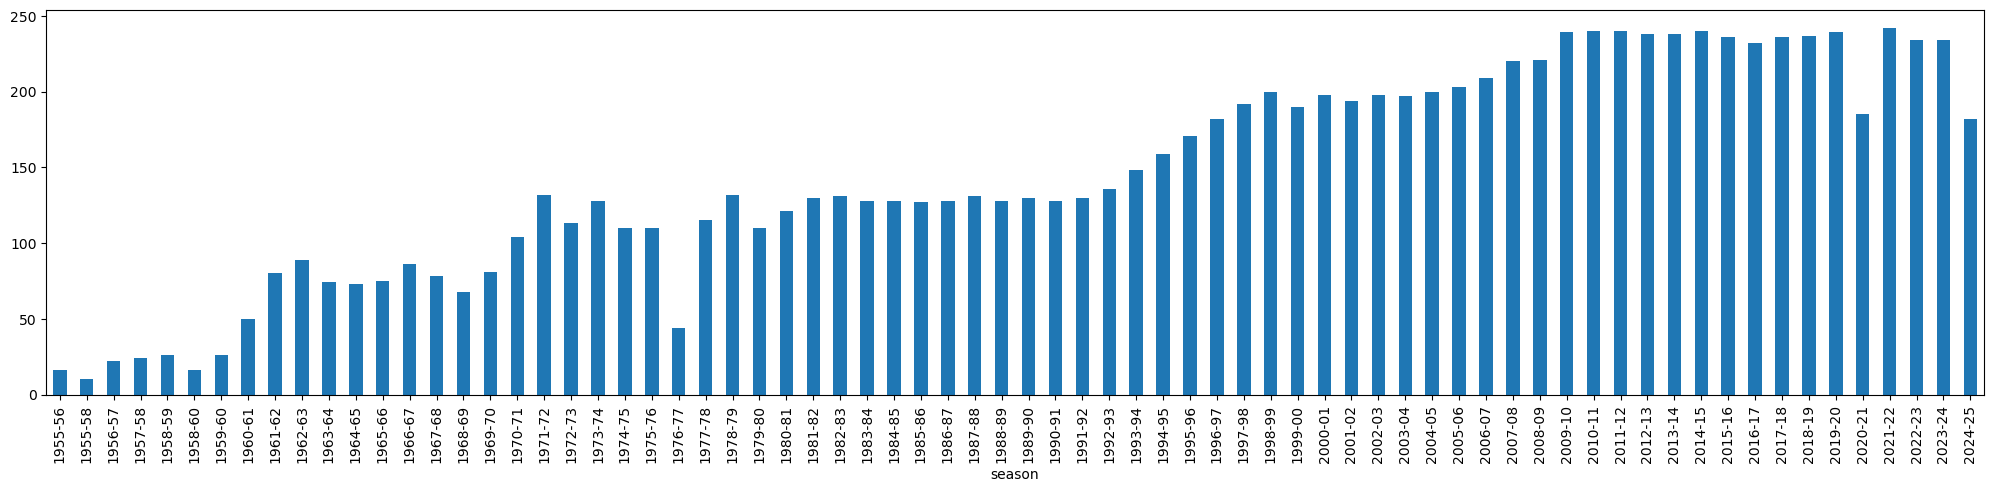

In [455]:
df.groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

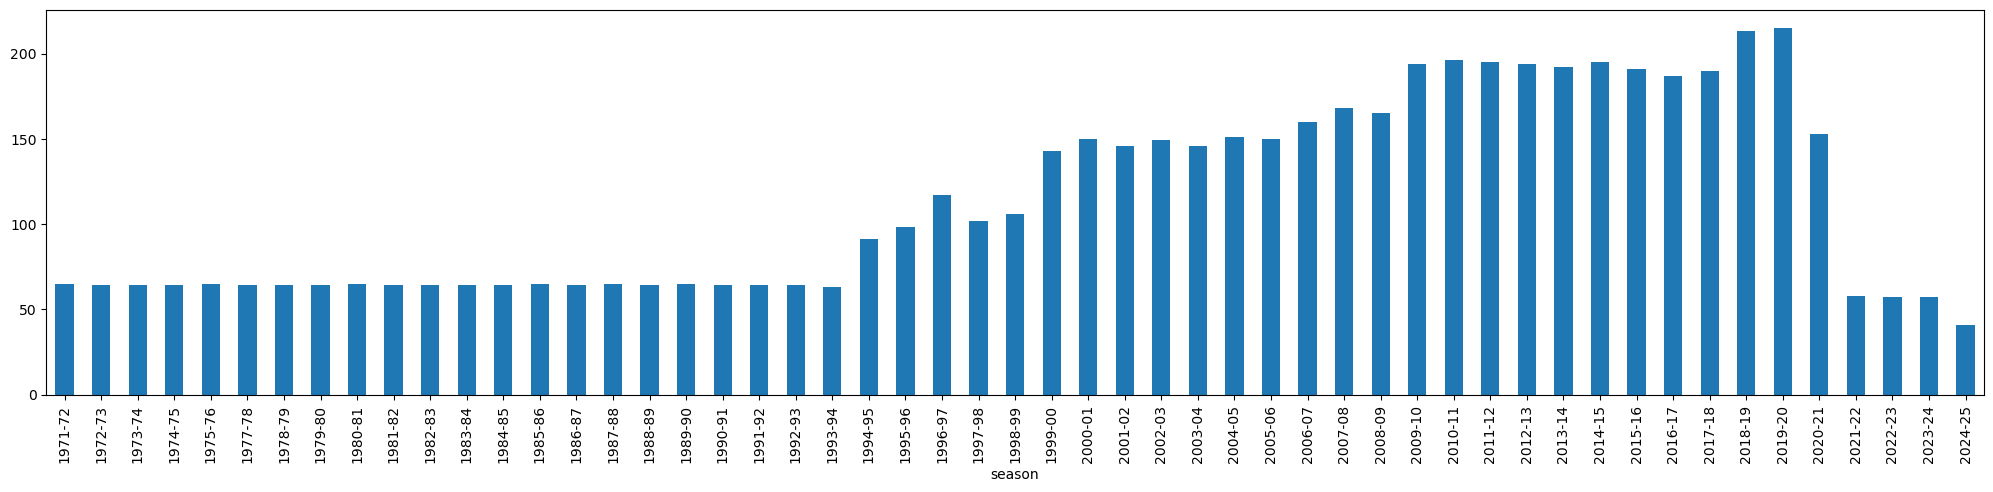

In [456]:
df[df['competition'] == 'EL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

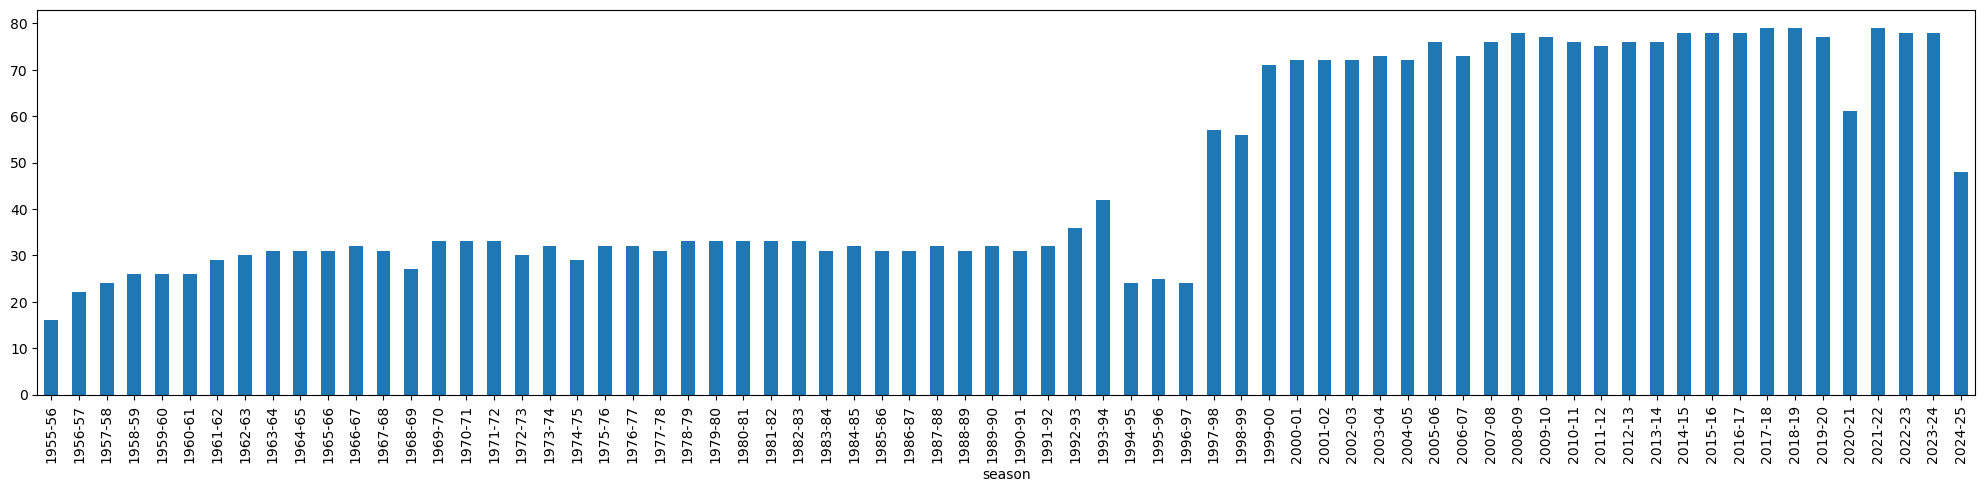

In [457]:
df[df['competition'] == 'UCL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

In [458]:
df[(df['competition'] == 'EL') & (df['season'] == '2021-22')]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count
14899,EL,2022-05-18,1-1 (a.e.t.),Eintracht Frankfurt,Germany,Eintracht_Frankfurt,Rangers,Scotland,Rangers_F.C.,"Ramón Sánchez Pizjuán Stadium, Seville",final,3,2021–22 UEFA Europa League knockout phase,2021-22,Seville,2.0
14900,EL,2021-09-15,0-1,Spartak Moscow,Russia,FC_Spartak_Moscow,Legia Warsaw,Poland,Legia_Warsaw,"Otkritie Arena, Moscow",groups,NaN,2021–22 UEFA Europa League group stage,2021-22,Moscow,40.0
14901,EL,2021-09-16,2-1,Olympiacos,Greece,Olympiacos_F.C.,Antwerp,Belgium,Royal_Antwerp_F.C.,"Karaiskakis Stadium, Piraeus",groups,1,2021–22 UEFA Europa League group stage,2021-22,Piraeus,40.0
14902,EL,2021-09-16,0-2,Rangers,Scotland,Rangers_F.C.,Lyon,France,Olympique_Lyonnais,"Ibrox Stadium, Glasgow",groups,4,2021–22 UEFA Europa League group stage,2021-22,Glasgow,40.0
14903,EL,2021-09-16,4-3,Real Betis,Spain,Real_Betis,Celtic,Scotland,Celtic_F.C.,"Benito Villamarín, Seville",groups,3,2021–22 UEFA Europa League group stage,2021-22,Seville,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,EL,2021-08-12,2-4,St Johnstone,Scotland,NaN,Galatasaray,Turkey,NaN,"McDiarmid Park, Perth",third qualifying round,NaN,2021–22 UEFA Europa League qualifying phase an...,2021-22,Perth,58.0
15072,EL,2021-08-12,3-0,Celtic,Scotland,NaN,Jablonec,Czech Republic,NaN,"Celtic Park, Glasgow",third qualifying round,5,2021–22 UEFA Europa League qualifying phase an...,2021-22,Glasgow,58.0
15073,EL,2021-08-12,3-0,HJK,Finland,NaN,Neftçi Baku,Azerbaijan,NaN,"Bolt Arena, Helsinki",third qualifying round,NaN,2021–22 UEFA Europa League qualifying phase an...,2021-22,Helsinki,58.0
15074,EL,2021-08-12,0-1,Žalgiris,Lithuania,NaN,Mura,Slovenia,NaN,"LFF Stadium, Vilnius",third qualifying round,2,2021–22 UEFA Europa League qualifying phase an...,2021-22,Vilnius,58.0


In [459]:
east[east['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(10)

homeTeam
Dynamo Kyiv          132
Red Star Belgrade     79
Shakhtar Donetsk      79
Sparta Prague         76
Steaua București      70
Dinamo Zagreb         67
Spartak Moscow        61
Partizan              53
BATE Borisov          52
CSKA Moscow           52
dtype: int64

In [460]:
east.groupby('homeTeam').size().nlargest(10000).index.to_list()

['Dynamo Kyiv',
 'Red Star Belgrade',
 'Dinamo Zagreb',
 'Sparta Prague',
 'Steaua București',
 'Partizan',
 'Shakhtar Donetsk',
 'Spartak Moscow',
 'Legia Warsaw',
 'Ferencváros',
 'Slavia Prague',
 'Hajduk Split',
 'CSKA Sofia',
 'Slovan Bratislava',
 'Zenit Saint Petersburg',
 'Dinamo București',
 'CSKA Moscow',
 'Maribor',
 'Dinamo Tbilisi',
 'Qarabağ',
 'Sheriff Tiraspol',
 'BATE Borisov',
 'Levski Sofia',
 'Ludogorets Razgrad',
 'Lokomotiv Moscow',
 'Dinamo Minsk',
 'Viktoria Plzeň',
 'Lech Poznań',
 'Spartak Trnava',
 'Dnipro Dnipropetrovsk',
 'Astana',
 'Wisła Kraków',
 'CFR Cluj',
 'Rijeka',
 'Universitatea Craiova',
 'Rapid București',
 'Dynamo Dresden',
 'Olimpija Ljubljana',
 'Sarajevo',
 'Dynamo Moscow',
 'Slovan Liberec',
 'Dukla Prague',
 'Pyunik',
 'Debrecen',
 'Ventspils',
 'Vojvodina',
 'Skonto',
 'Zimbru Chisinau',
 'Litex Lovech',
 'RB Leipzig',
 'Rubin Kazan',
 'Baník Ostrava',
 'Krasnodar',
 'Metalist Kharkiv',
 'Widzew Łódź',
 'Carl Zeiss Jena',
 'Torpedo Moscow'

In [461]:
east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])

C:\Users\micha\AppData\Local\Temp\ipykernel_2380\3891702428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
C:\Users\micha\AppData\Local\Temp\ipykernel_2380\3891702428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])


In [462]:
nazvy = east.groupby('nazev')['dedina'].nunique().nlargest(1000)
nazvy = nazvy[nazvy >= 3]
nazvy

nazev
Spartak      12
Dinamo       10
FK            8
Dynamo        7
CSKA          6
FC            5
Artmedia      3
Vasas         3
Torpedo       3
Arsenal       3
Budućnost     3
MTK           3
Inter         3
Lokomotiv     3
Slavia        3
Khazar        3
Metalurh      3
Levadia       3
NK            3
Zagłębie      3
Zenit         3
Daugava       3
Újpest        3
Bohemians     3
Olimpija      3
Name: dedina, dtype: int64

In [463]:
east[east['homeTeam'].str.lower().str.contains('kyi',na=False)]['homeTeam'].drop_duplicates()

481       Dynamo Kyiv
1893        CSKA Kyiv
11092    Arsenal Kyiv
Name: homeTeam, dtype: object

In [464]:
east[east['nazev'].str.contains('Slav',na=False)]['homeTeam'].drop_duplicates()

130      Slavia Sofia
1809    Slavia Prague
6109     Slavia Mozyr
8232    Slaven Belupo
9502          Slavija
Name: homeTeam, dtype: object

In [465]:
east[east['nazev'].str.contains('Olim',na=False)]['homeTeam'].drop_duplicates()

314      Olimpija Ljubljana
1580          Olimpija Rīga
8589             Olimps/RFS
8650           Olimpik Baku
8939         Olimpi Rustavi
9688               Olimpija
9699                Olimpia
12133               Olimpic
13462       Olimpik Donetsk
Name: homeTeam, dtype: object

In [466]:
east[east['nazev'].str.contains('Loko',na=False)]['homeTeam'].drop_duplicates()

541           Lokomotiv Sofia
702        Lokomotive Leipzig
1707         Lokomotiv Moscow
1956     Lokomotiv-96 Vitebsk
2028        Lokomotiv Plovdiv
2787        Lokomotíva Košice
11468              Lokomotiva
Name: homeTeam, dtype: object

In [467]:
east[east['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1143          Metalist Kharkiv
6717       Metalurh Zaporizhya
6787          Metalurh Donetsk
6839     Metalurh Zaporizhzhya
9722           Metalurg Skopje
10494      Metalurgist Rustavi
10703        Metalurgi Rustavi
Name: homeTeam, dtype: object

In [468]:
east[east['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

8           Dinamo Zagreb
32          Dynamo Žilina
207           Dynamo Kiev
289      Dinamo București
338         Dinamo Tirana
364         Dynamo Moscow
481           Dynamo Kyiv
642        Dinamo Tbilisi
763        Dynamo Dresden
1070         Dinamo Minsk
1621        Dinamo Batumi
1654      Dinamo-93 Minsk
5396     Dinamo Bucharest
5595          Dynamo Baku
8289         Dinamo Brest
13901        Dynamo Brest
15805      Dinamo Pitești
15951        Dinamo Bacău
Name: homeTeam, dtype: object

In [469]:
east.groupby('city').size().nlargest(60)

city
Belgrade            378
Prague              341
Bucharest           339
Moscow              338
Budapest            308
Sofia               304
Kyiv                223
Zagreb              197
Baku                193
Tbilisi             154
Warsaw              147
Skopje              144
Yerevan             143
Bratislava          141
Tallinn             134
Tirana              109
Split               101
Donetsk              99
Riga                 95
Maribor              93
Minsk                93
Sarajevo             93
Tiraspol             91
Saint Petersburg     89
Chișinău             80
Vilnius              73
Podgorica            71
Leipzig              69
Plzeň                63
Poznań               62
Razgrad              62
Trnava               62
Cluj-Napoca          61
Kraków               59
Ljubljana            58
Rijeka               53
Žilina               50
Barysaw              49
Chorzów              49
Astana               47
Craiova              47
Dresden    

In [470]:
east[east['competition'] == 'UCL'].sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
19570,UCL,1989-05-24,0-4,Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Milan,Italy,AC_Milan,"Camp Nou, Barcelona",final,97000,1988–89 European Cup,1988-89,Barcelona,2.0,Steaua,București
19691,UCL,1991-05-29,0-0 (a.e.t.),Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Marseille,France,Olympique_de_Marseille,"Stadio San Nicola, Bari",final,51587,1990–91 European Cup,1990-91,Bari,2.0,Red,Belgrade
19393,UCL,1986-05-07,0-0 (a.e.t.),Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Barcelona,Spain,FC_Barcelona,"Estadio Ramón Sánchez Pizjuán, Seville",final,65000,1985–86 European Cup,1985-86,Seville,2.0,Steaua,București
19567,UCL,1988-04-06,0-0,Steaua București,Romania,FCSB,Benfica,Portugal,S.L._Benfica,"Stadionul Steaua, Bucharest",semi-finals,2,1987–88 European Cup,1987-88,Bucharest,4.0,Steaua,București
17730,UCL,1957-04-03,0-1,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Fiorentina,Italy,ACF_Fiorentina,"Stadion JNA, Belgrade",semi-finals,40000,1956–57 European Cup,1956-57,Belgrade,4.0,Red,Belgrade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25931,UCL,2024-08-07,v,Slavia Prague,Czech Republic,SK_Slavia_Prague,Union Saint-Gilloise,Belgium,Royale_Union_Saint-Gilloise,"Fortuna Arena, Prague",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Prague,NaN,Slavia,Prague
25932,UCL,2024-08-07,v,Slovan Bratislava,Slovakia,%C5%A0K_Slovan_Bratislava,APOEL,Cyprus,APOEL_FC,"Národný futbalový štadión, Bratislava",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Bratislava,NaN,Slovan,Bratislava
25934,UCL,2024-08-13,v,Ferencváros,Hungary,NaN,Midtjylland,Denmark,NaN,"Ferencváros Stadion, Budapest",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Budapest,NaN,Ferencváros,Ferencváros
25938,UCL,2024-08-13,v,FCSB,Romania,NaN,Sparta Prague,Czech Republic,NaN,"Steaua Stadium, Bucharest",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Bucharest,NaN,FCSB,FCSB


In [471]:
east.sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
642,CWC,1981-05-13,2-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,FC Carl Zeiss Jena,East Germany,FC_Carl_Zeiss_Jena,"Rheinstadion, Düsseldorf",final,4750.0,1980–81 European Cup Winners' Cup,1980-81,Düsseldorf,2.0,Dinamo,Tbilisi
19691,UCL,1991-05-29,0-0 (a.e.t.),Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Marseille,France,Olympique_de_Marseille,"Stadio San Nicola, Bari",final,51587,1990–91 European Cup,1990-91,Bari,2.0,Red,Belgrade
3496,EL,1985-05-08,0-3,Videoton,Hungary,Videoton_FC,Real Madrid,Spain,Real_Madrid_CF,"Sóstói Stadion, Székesfehérvár",final,35000,1984–85 UEFA Cup,1984-85,Székesfehérvár,2.0,Videoton,Videoton
15613,ICFC,1963-06-12,1-2,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,GNK_Dinamo_Zagreb,Valencia,Spain,Valencia_CF,"Stadion Maksimir, Zagreb",final,40000,1962–63 Inter-Cities Fairs Cup,1962-63,Zagreb,2.0,Dinamo,Zagreb
481,CWC,1975-05-14,3-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"St. Jakob Stadium, Basel",final,13000.0,1974–75 European Cup Winners' Cup,1974-75,Basel,2.0,Dynamo,Kyiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27319,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Mostar,NaN,Zrinjski,Mostar
27320,UECL,2024-08-15,v,Fehérvár,Hungary,NaN,Omonia,Cyprus,NaN,"Sóstói Stadion, Székesfehérvár",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Székesfehérvár,NaN,Fehérvár,Fehérvár
27321,UECL,2024-08-15,v,Baník Ostrava,Czech Republic,NaN,Copenhagen,Denmark,NaN,"Městský stadion, Ostrava",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Ostrava,NaN,Baník,Ostrava
27322,UECL,2024-08-15,v,Sheriff Tiraspol,Moldova,NaN,Olimpija Ljubljana,Slovenia,NaN,"Sheriff Arena, Tiraspol",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Tiraspol,NaN,Sheriff,Tiraspol


<Axes: xlabel='season'>

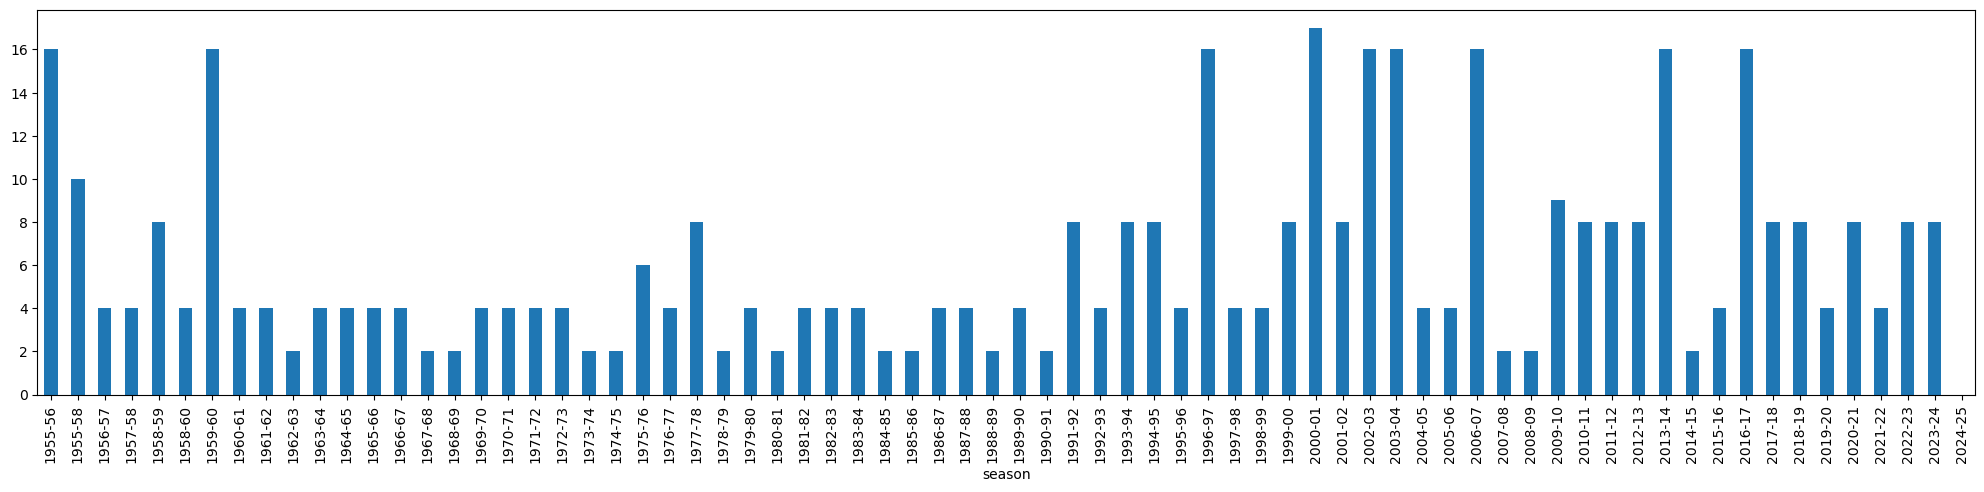

In [472]:
east.groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

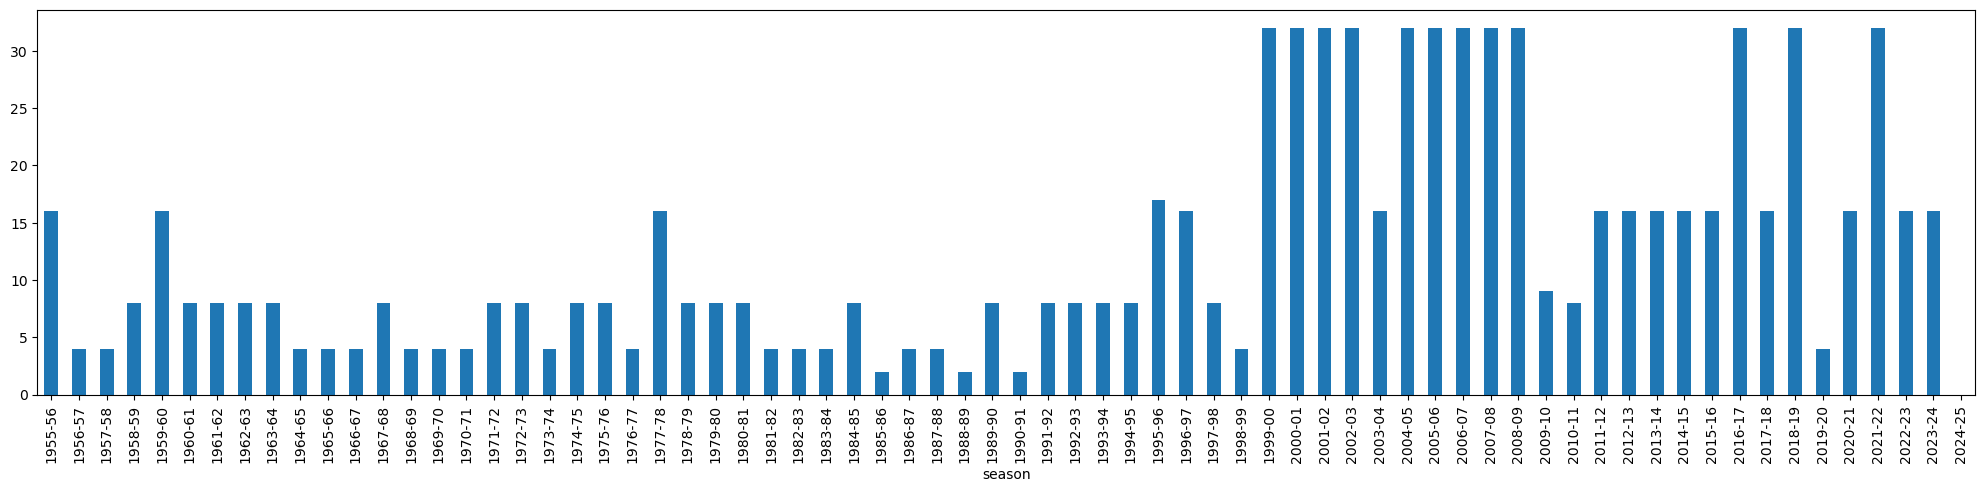

In [473]:
east[east['competition'] == 'UCL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [474]:
east[east['homeTeamCountry'] == 'Republic of Ireland']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
25977,UECL,2021-07-15,3-0,Bohemians,Republic of Ireland,NaN,Stjarnan,Iceland,NaN,"Aviva Stadium, Dublin",first qualifying round,NaN,2021–22 UEFA Europa Conference League qualifyi...,2021-22,Dublin,177.0,Bohemians,Bohemians
26206,UECL,2021-07-29,3-0,Bohemians,Republic of Ireland,NaN,Dudelange,Luxembourg,NaN,"Aviva Stadium, Dublin",second qualifying round,NaN,2021–22 UEFA Europa Conference League qualifyi...,2021-22,Dublin,142.0,Bohemians,Bohemians


In [475]:
east[east['competition'] == 'UCL'].groupby('homeTeamCountry')['remaining_teams_count'].min().nsmallest(50)

homeTeamCountry
Socialist Federal Republic of Yugoslavia     2.0
Romania                                      2.0
Ukraine                                      4.0
Poland                                       4.0
Bulgaria                                     4.0
Soviet Union                                 4.0
Czechoslovakia                               4.0
Hungary                                      4.0
Germany                                      4.0
Russia                                       8.0
Commonwealth of Independent States           8.0
Croatia                                      8.0
East Germany                                 8.0
Albania                                     16.0
Czech Republic                              16.0
Slovakia                                    24.0
Kazakhstan                                  32.0
Slovenia                                    32.0
Serbia                                      32.0
Moldova                                     32.0
Azer

<Axes: xlabel='season'>

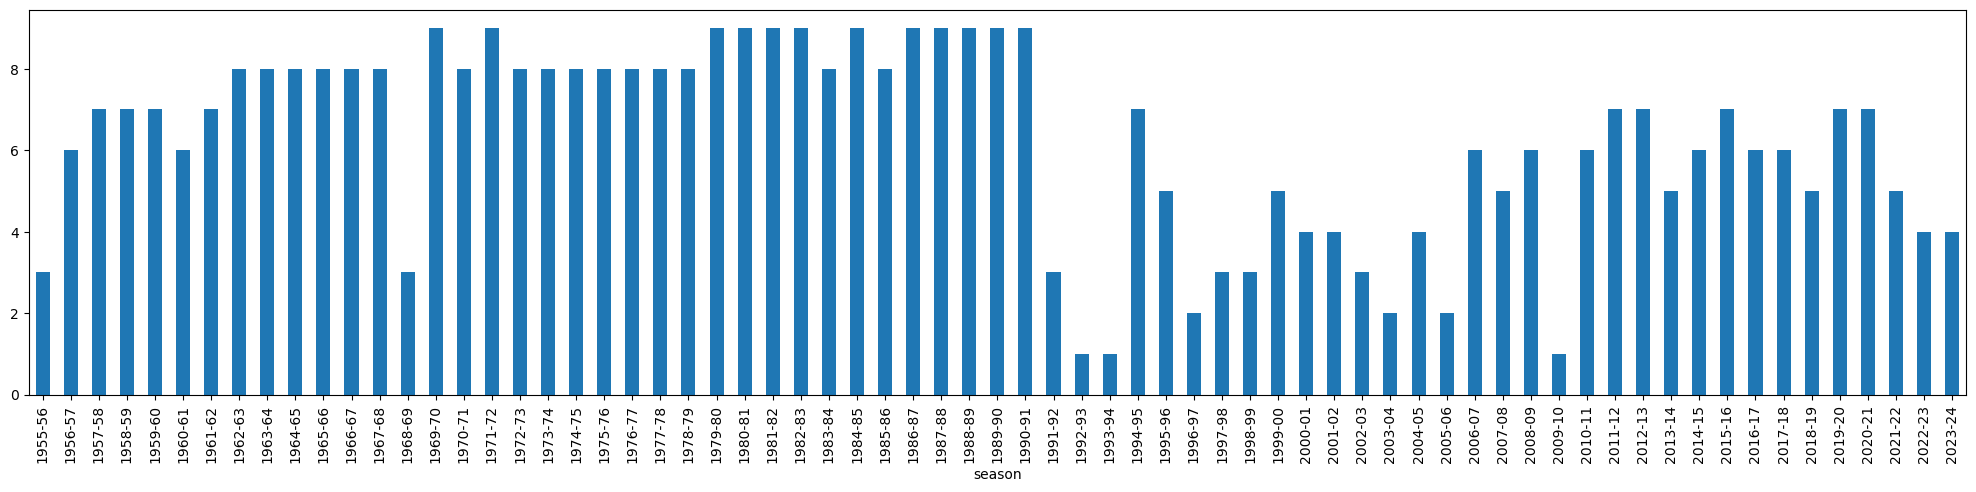

In [476]:
east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season', ylabel='remaining_teams_count'>

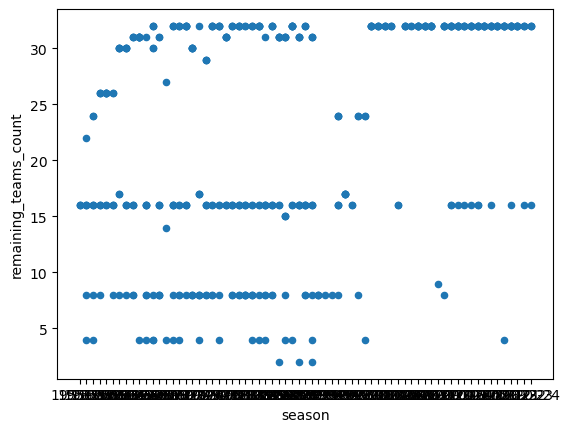

In [477]:
pd.DataFrame(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby(['season','homeTeam'])['remaining_teams_count'].min()).reset_index().plot.scatter(x='season',y='remaining_teams_count')

<Axes: xlabel='season'>

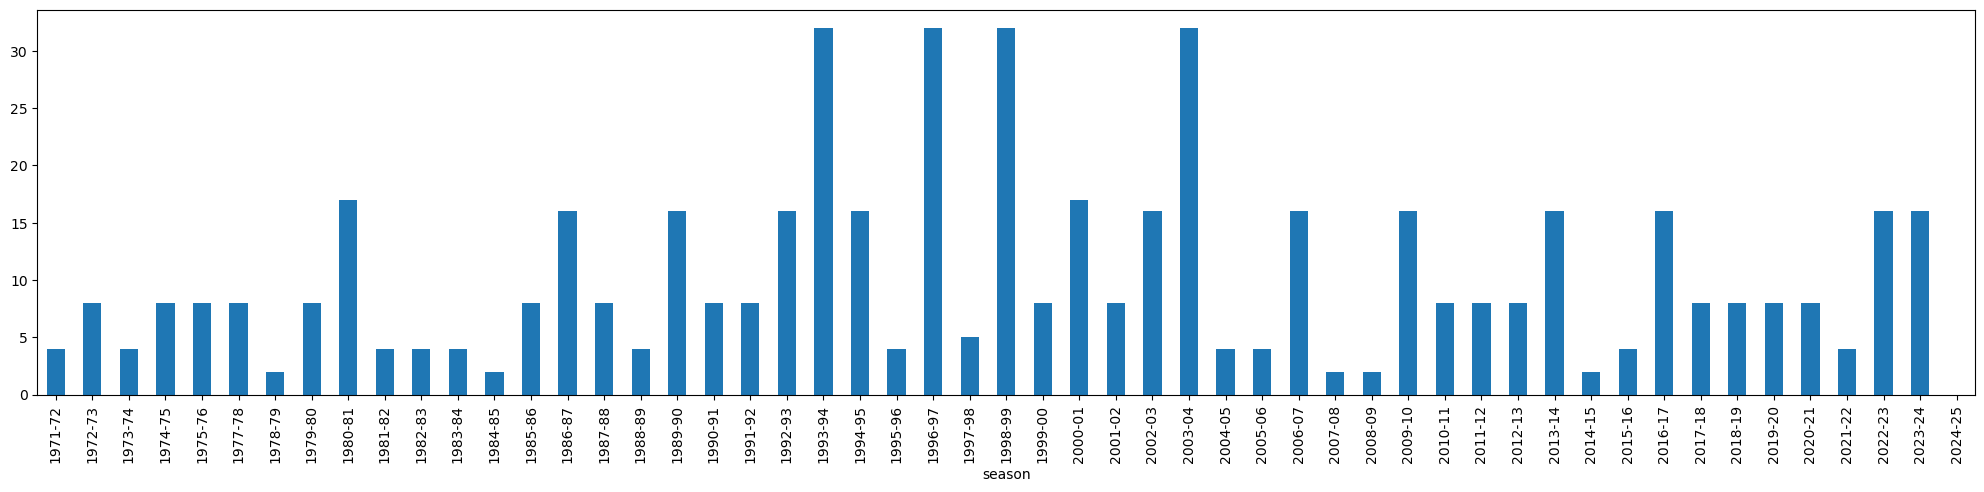

In [478]:
east[east['competition'] == 'EL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

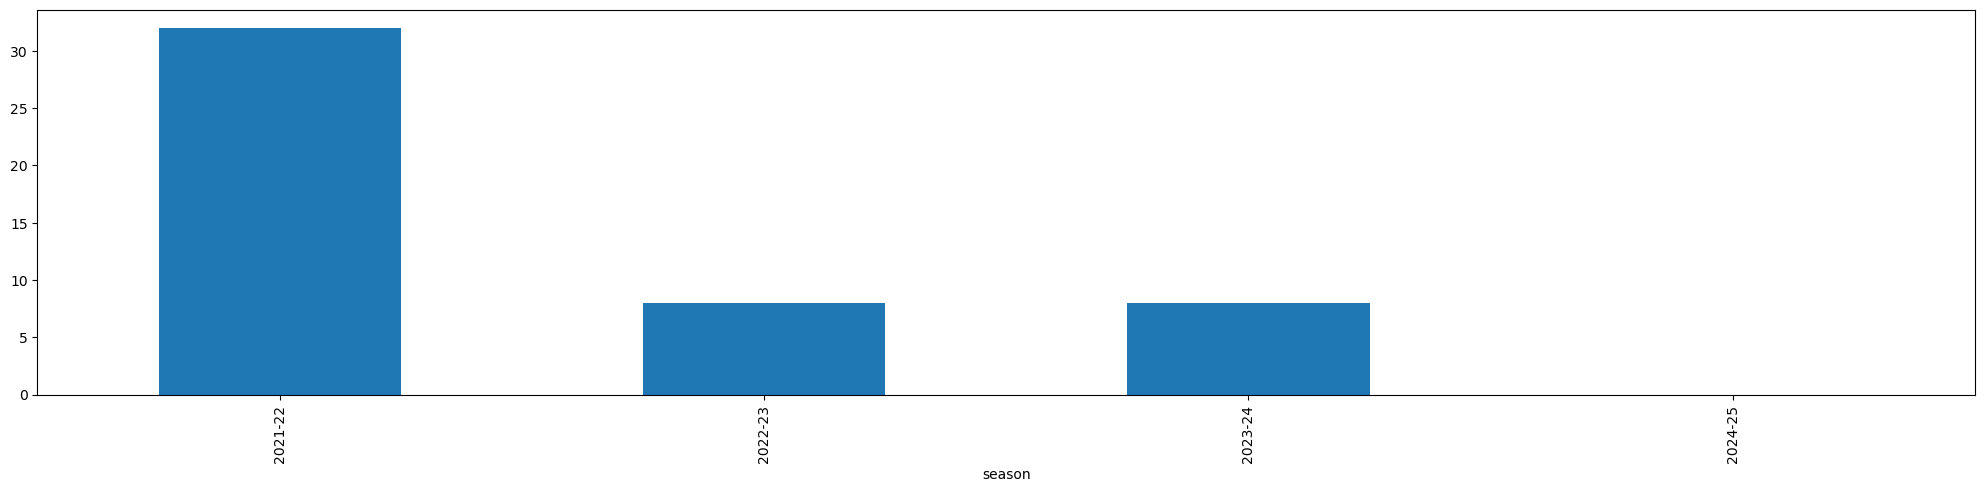

In [479]:
east[east['competition'] == 'UECL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [480]:
east[(east['competition'] == 'UCL')].groupby(['season','homeTeamCountry'])['remaining_teams_count'].min()

season   homeTeamCountry                         
1955-56  Hungary                                     16.0
         Poland                                      16.0
         Socialist Federal Republic of Yugoslavia    16.0
1956-57  Bulgaria                                     8.0
         Czechoslovakia                              16.0
                                                     ... 
2024-25  Romania                                      NaN
         Serbia                                       NaN
         Slovakia                                     NaN
         Slovenia                                     NaN
         Ukraine                                      NaN
Name: remaining_teams_count, Length: 995, dtype: float64